In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

files = sorted([f for f in os.listdir() if '.npy' in f])
files = [f for f in files if 'Rside' in f]
files

['VR5_Vehicle PFC-HPC_Rside Rewarded Theta xcorr by trial.npy',
 'VR5_Vehicle PFC-HPC_Rside Unrewarded Theta xcorr by trial.npy']

In [2]:
veh_rw = np.load(files[0])
veh_unrw = np.load(files[1])
veh_rw

array([[-0.16348744, -0.16325112, -0.16298599, ...,  0.42997739,
         0.42836243,  0.42673562],
       [-0.15374122, -0.15642147, -0.15905533, ..., -0.02649682,
        -0.02951236, -0.0325142 ],
       [ 0.21397037,  0.21443618,  0.2148927 , ...,  0.40652144,
         0.40219665,  0.39784268],
       ...,
       [-0.08409154, -0.08407537, -0.08403425, ...,  0.67370168,
         0.67080292,  0.66788226],
       [ 0.55636998,  0.55864124,  0.56090879, ...,  0.28403691,
         0.28278286,  0.2814883 ],
       [ 0.0096864 ,  0.00916174,  0.00864272, ..., -0.19316639,
        -0.19837836, -0.20358534]])

In [3]:
def normalize_R(arr):
    arrmin = np.min(arr)
    arrmax = np.max(arr)
    
    norm = np.array([(x - arrmin)/(arrmax - arrmin) for x in arr])
    
    return norm

sem @ peak lag:  0.09180921701653387


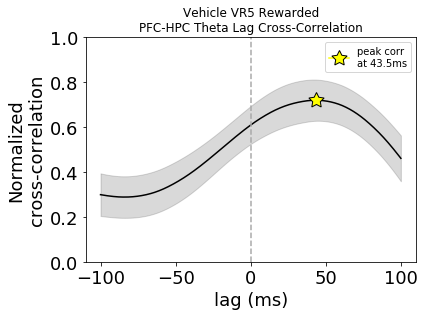

In [14]:
norm = [normalize_R(arr) for arr in veh_rw]
mean_norm = np.sum(norm, axis=0) / len(norm)
sems = np.array([np.std(arr) / (len(arr)**(1/2)) for arr in np.array(norm).T])
lags = np.linspace(-100,100, len(mean_norm))

plt.figure(figsize=(6,4.5))
plt.plot(lags, mean_norm, c='k')
plt.fill_between(lags, mean_norm-sems, mean_norm+sems,alpha=0.15, color='k')

plt.xticks([-100,-50,0,50,100],fontsize=18)
plt.xlabel('lag (ms)', size=18)

plt.ylim(0,1)
plt.yticks(fontsize=18)
plt.ylabel('Normalized\ncross-correlation', size=18)

plt.axvline(x=0, c='darkgray', linestyle='--')

plt.plot(lags[np.where(mean_norm == np.max(mean_norm))[0][0]], np.max(mean_norm), marker=(5,1), markersize=16,
        c='yellow', markeredgecolor='k', label=f'peak corr\nat {lags[np.where(mean_norm == np.max(mean_norm))[0][0]]}ms')
plt.legend(loc='best')

plt.title('Vehicle VR5 Rewarded\nPFC-HPC Theta Lag Cross-Correlation')
plt.tight_layout()
plt.savefig('Vehicle VR5 Rewarded PFC-HPC Theta Lag Cross-Correlation.png', dpi=600)

print('sem @ peak lag: ',sems[np.where(mean_norm == np.max(mean_norm))[0][0]])

In [5]:
import pandas as pd

df = pd.DataFrame()
df['lags'] = lags
df['VR5_Vehicle_Rewarded_mean_xcorr'] = mean_norm

df.to_csv('VR5_Vehicle_Rewarded_mean_xcorr.csv')

sem @ peak lag:  0.04185536496569081


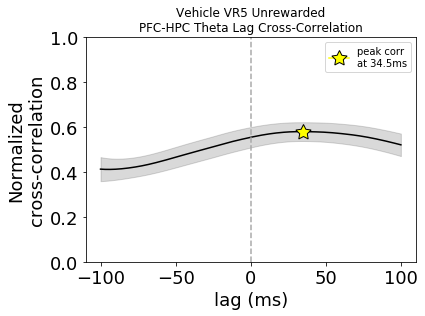

In [13]:
norm = [normalize_R(arr) for arr in veh_unrw]
mean_norm = np.sum(norm, axis=0) / len(norm)
sems = np.array([np.std(arr) / (len(arr)**(1/2)) for arr in np.array(norm).T])
lags = np.linspace(-100,100, len(mean_norm))

plt.figure(figsize=(6,4.5))
plt.plot(lags, mean_norm, c='k')
plt.fill_between(lags, mean_norm-sems, mean_norm+sems,alpha=0.15, color='k')

plt.xticks([-100,-50,0,50,100],fontsize=18)
plt.xlabel('lag (ms)', size=18)

plt.ylim(0,1)
plt.yticks(fontsize=18)
plt.ylabel('Normalized\ncross-correlation', size=18)

plt.axvline(x=0, c='darkgray', linestyle='--')

plt.plot(lags[np.where(mean_norm == np.max(mean_norm))[0][0]], np.max(mean_norm), marker=(5,1), markersize=16,
        c='yellow', markeredgecolor='k', label=f'peak corr\nat {lags[np.where(mean_norm == np.max(mean_norm))[0][0]]}ms')
plt.legend(loc='best')

plt.title('Vehicle VR5 Unrewarded\nPFC-HPC Theta Lag Cross-Correlation')
plt.tight_layout()
plt.savefig('Vehicle VR5 Unrewarded PFC-HPC Theta Lag Cross-Correlation, bytrial.png', dpi=600)

print('sem @ peak lag: ',sems[np.where(mean_norm == np.max(mean_norm))[0][0]])

In [7]:
[np.std(norm[:][i]) / len(norm) for i in range(len(norm))]

[0.006434809104283465,
 0.006300782151158944,
 0.004447501004534848,
 0.005776709077732321,
 0.0048240140698828276,
 0.006031190044646851,
 0.005658428630184972,
 0.003980615668507848,
 0.006452653595969647,
 0.0060055100076620216,
 0.00628422093999201,
 0.004388599708843138,
 0.006167145784810098,
 0.005537981074543869,
 0.004843612735942314,
 0.005413861355706056,
 0.004877862106834896,
 0.004530858966600881,
 0.006166470716561691,
 0.0052894454205195006,
 0.0052570484686785554,
 0.005002169085279409,
 0.004496913288515107,
 0.006379075366669557,
 0.00625324880982879,
 0.005505925533384663,
 0.00622556733760428,
 0.004905665711893194,
 0.003988184022667148,
 0.005138584887501849,
 0.00479612380611777,
 0.004789781853536317,
 0.005674990320236162,
 0.005124312590386894,
 0.005049136874711798,
 0.005005315980527957,
 0.0050552247552782285,
 0.00530880490708634,
 0.005510199623177929,
 0.003672132557331109,
 0.005940309249336795,
 0.0049627197365741645,
 0.005433093428875436,
 0.0059080

In [8]:
sems

array([0.00697213, 0.00691976, 0.0068685 , 0.00681839, 0.0067694 ,
       0.00672153, 0.00667484, 0.00662924, 0.00658491, 0.00654168,
       0.00649957, 0.00645847, 0.00641846, 0.00637953, 0.00634165,
       0.00630487, 0.00626918, 0.00623457, 0.00620102, 0.00616859,
       0.00613722, 0.00610694, 0.00607774, 0.00604966, 0.0060227 ,
       0.00599682, 0.00597205, 0.00594834, 0.0059257 , 0.0059042 ,
       0.00588373, 0.00586428, 0.0058459 , 0.00582854, 0.0058122 ,
       0.00579685, 0.00578246, 0.00576902, 0.00575652, 0.00574488,
       0.00573405, 0.00572398, 0.00571494, 0.00570682, 0.00569967,
       0.00569345, 0.0056881 , 0.00568359, 0.00567994, 0.00567708,
       0.00567498, 0.00567362, 0.00567296, 0.00567297, 0.00567357,
       0.00567482, 0.00567665, 0.005679  , 0.00568184, 0.0056851 ,
       0.00568874, 0.00569274, 0.0056971 , 0.0057018 , 0.00570682,
       0.00571211, 0.00571768, 0.00572362, 0.00572998, 0.00573657,
       0.00574332, 0.00575027, 0.00575737, 0.00576459, 0.00577